## Importing the libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Importing the dataset

In [4]:
df = pd.read_csv('./IMDB dataset/IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


<Axes: xlabel='sentiment', ylabel='count'>

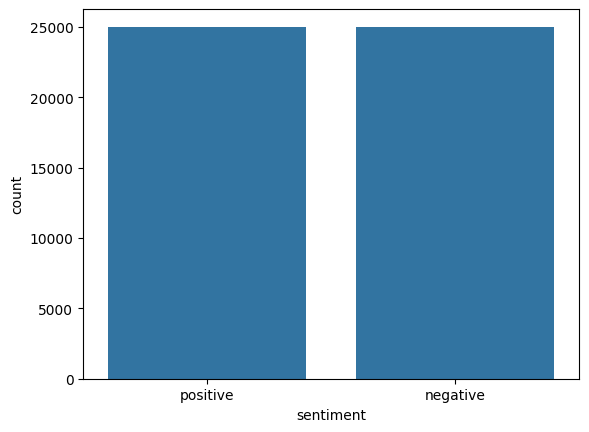

In [5]:
sns.barplot(df['sentiment'].value_counts()) ## equal number of positive and negative reviews

### Preprocessing

In [111]:
import nltk
nltk.download("stopwords")
nltk.download("punkt")

from nltk.corpus import stopwords
print(stopwords.words('english'))


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Removing HTML tags

In [112]:
from bs4 import BeautifulSoup
import re

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()


#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    # text = remove_between_square_brackets(text)
    return text


#Apply function on review column
df['review']=df['review'].apply(denoise_text)

df['review'].iloc[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

### Removing Punctuation

In [113]:
stopwords_list = stopwords.words('english')

In [114]:
import string
import nltk
from nltk.tokenize import word_tokenize

# Make sure you have downloaded 'punkt' if not already
nltk.download('punkt_tab')

def text_process(mess):
    # Tokenize using nltk's word_tokenize (which uses punkt)
    words = word_tokenize(mess)

    # Remove punctuation
    nopunc = [word for word in words if word not in string.punctuation]

    # Remove stopwords (assuming stopwords_list is defined)
    return [word.lower() for word in nopunc if word.lower() not in stopwords_list]

# Apply the updated function
testFilter1 = df['review'].apply(text_process)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### Creating the word cloud

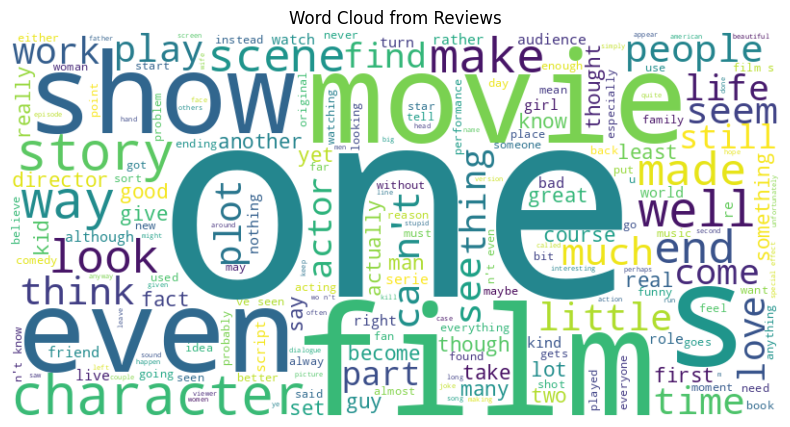

In [115]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


dfWord = pd.DataFrame(testFilter1)

# Flatten all reviews into a single list of words
all_words = [word for review in dfWord['review'] for word in review]

# Join all words into one string
text = ' '.join(all_words)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud from Reviews')
plt.show()


## Creating train test split

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['review'],data['sentiment'], test_size=0.2, random_state=101)

## Creating Bag of words + Tfidf

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Using TfidfVectorizer with your custom analyzer (text_process function)
tfidf = TfidfVectorizer(analyzer=text_process, max_features=5000)

# Transform the X_train into TF-IDF features
X_train = tfidf.fit_transform(X_train)


In [118]:
len(tfidf.get_feature_names_out())

5000

## Model Selection

## Naive Bayes

In [119]:
from operator import imod
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(X_train,y_train)

MultinomialNB()

In [120]:
X_test = tfidf.transform(X_test)


predictedVal1 = nb.predict(X_test)
trainVal = nb.predict(X_train)

In [121]:
predictedVal1

array(['negative', 'positive', 'positive', ..., 'negative', 'positive',
       'positive'], dtype='<U8')

In [122]:
from sklearn.metrics import confusion_matrix, classification_report

print('---------Test Accuracy------------')
print(classification_report(y_test,predictedVal1))
print(confusion_matrix(y_test,predictedVal1))

---------Test Accuracy------------
              precision    recall  f1-score   support

    negative       0.85      0.86      0.85      4959
    positive       0.86      0.86      0.86      5041

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

[[4242  717]
 [ 723 4318]]


In [123]:
from sklearn.metrics import confusion_matrix, classification_report

print('---------Train Accuracy------------')
print(classification_report(y_train,trainVal))
print(confusion_matrix(y_train,trainVal))

---------Train Accuracy------------
              precision    recall  f1-score   support

    negative       0.87      0.86      0.86     20041
    positive       0.86      0.87      0.86     19959

    accuracy                           0.86     40000
   macro avg       0.86      0.86      0.86     40000
weighted avg       0.86      0.86      0.86     40000

[[17213  2828]
 [ 2621 17338]]


## Random forest

In [124]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth = 7)

rfc.fit(X_train, y_train)

predictedVal1 = rfc.predict(X_test)

trainVal = rfc.predict(X_train)

In [125]:
from sklearn.metrics import confusion_matrix, classification_report


print('---------Test Accuracy------------')
print(classification_report(y_test,predictedVal1))
print(confusion_matrix(y_test,predictedVal1))

---------Test Accuracy------------
              precision    recall  f1-score   support

    negative       0.84      0.79      0.81      4959
    positive       0.80      0.86      0.83      5041

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

[[3898 1061]
 [ 724 4317]]


In [126]:
from sklearn.metrics import confusion_matrix, classification_report


print('---------Train Accuracy------------')
print(classification_report(y_train,trainVal))
print(confusion_matrix(y_train,trainVal))

---------Train Accuracy------------
              precision    recall  f1-score   support

    negative       0.87      0.79      0.83     20041
    positive       0.81      0.88      0.84     19959

    accuracy                           0.83     40000
   macro avg       0.84      0.83      0.83     40000
weighted avg       0.84      0.83      0.83     40000

[[15821  4220]
 [ 2395 17564]]


## Logistic Regression

In [127]:
from sklearn.linear_model import LogisticRegression

log1 = LogisticRegression()

log1.fit(X_train,y_train)

predictedVal = log1.predict(X_test)

trainVal = log1.predict(X_train)

In [128]:
from sklearn.metrics import confusion_matrix, classification_report

print('---------Test Accuracy------------')
print(classification_report(y_test,predictedVal1))
print(confusion_matrix(y_test,predictedVal1))

---------Test Accuracy------------
              precision    recall  f1-score   support

    negative       0.84      0.79      0.81      4959
    positive       0.80      0.86      0.83      5041

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

[[3898 1061]
 [ 724 4317]]


In [129]:
from sklearn.metrics import confusion_matrix, classification_report

print('---------Train Accuracy------------')
print(classification_report(y_train,trainVal))
print(confusion_matrix(y_train,trainVal))

---------Train Accuracy------------
              precision    recall  f1-score   support

    negative       0.92      0.90      0.91     20041
    positive       0.90      0.92      0.91     19959

    accuracy                           0.91     40000
   macro avg       0.91      0.91      0.91     40000
weighted avg       0.91      0.91      0.91     40000

[[18101  1940]
 [ 1533 18426]]


## XGBoost

In [130]:
y_train.replace({'positive': 1, 'negative': 0}, inplace=True)
y_test.replace({'positive': 1, 'negative': 0}, inplace=True)
y_train

<ipython-input-130-bf3616c09687>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train.replace({'positive': 1, 'negative': 0}, inplace=True)
<ipython-input-130-bf3616c09687>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test.replace({'positive': 1, 'negative': 0}, inplace=True)


,sentiment
4166,1
29644,1
27558,0
11222,0
5671,0
...,...
5695,1
8006,0
17745,0
17931,0


In [131]:
from xgboost import XGBClassifier

xg1 = XGBClassifier()

xg1.fit(X_train, y_train)

predictedVal1 = xg1.predict(X_test)

trainVal1 = xg1.predict(X_train)

In [132]:
from sklearn.metrics import confusion_matrix, classification_report

print('---------Test Accuracy------------')
print(classification_report(y_test,predictedVal1))
print(confusion_matrix(y_test,predictedVal1))

---------Test Accuracy------------
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4959
           1       0.85      0.87      0.86      5041

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

[[4191  768]
 [ 636 4405]]


In [133]:
import pandas as pd

trainVal = pd.Series(trainVal)  # or pd.DataFrame(trainVal)
trainVal.replace({'positive': 1, 'negative': 0}, inplace=True)


<ipython-input-133-efa1963ecc92>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  trainVal.replace({'positive': 1, 'negative': 0}, inplace=True)


In [134]:
from sklearn.metrics import confusion_matrix, classification_report

print('---------Train Accuracy------------')
print(classification_report(y_train,trainVal))
print(confusion_matrix(y_train,trainVal))

---------Train Accuracy------------
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     20041
           1       0.90      0.92      0.91     19959

    accuracy                           0.91     40000
   macro avg       0.91      0.91      0.91     40000
weighted avg       0.91      0.91      0.91     40000

[[18101  1940]
 [ 1533 18426]]


## Conclusion

| Model                   | Test Accuracy | Train Accuracy | Notes                       |
| ----------------------- | ------------- | -------------- | --------------------------- |
| **Naive Bayes**         | 86%           | 86%            | Balanced performance        |
| **Random Forest**       | 82%           | 83%            | Slight underfitting         |
| **Logistic Regression** | 82%           | 91%            | Overfitting present         |
| **XGBoost**             | 86%           | 91%            | Slightly overfitting        |
